<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [5]:
df_dups = df.duplicated()
df_dups_all = df[df.duplicated(keep=False)].copy()

In [6]:
print(f"There's {df_dups.sum()} duplicated rows in this Dataframe.")

# Code to show table with duplicated rows in pairs (first-dups)
# df_dups_sorted = df_dups_all.sort_values(by="ResponseId")
# ordered_rows = []
# for response_id, group in df_dups_sorted.groupby("ResponseId"):
#     group_sorted = group.sort_index()
#     ordered_rows.append(group_sorted)
# result = pd.concat(ordered_rows)
# result.head(10)

print(df_dups_all.head(20))

There's 20 duplicated rows in this Dataframe.
       ResponseId                                         MainBranch  \
0               1                     I am a developer by profession   
1               2                     I am a developer by profession   
2               3                     I am a developer by profession   
3               4                              I am learning to code   
4               5                     I am a developer by profession   
5               6                        I code primarily as a hobby   
6               7  I am not primarily a developer, but I write co...   
7               8                              I am learning to code   
8               9                        I code primarily as a hobby   
9              10                     I am a developer by profession   
9937         9938                     I am a developer by profession   
18521       18522                     I am a developer by profession   
22000       22001 

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [7]:
subset=["MainBranch", "Employment", "RemoteWork"]
# subset=["MainBranch", "Employment", "RemoteWork", "Check", "CodingActivities"]
# subset = ['MainBranch', 'Employment', 'Check', 'BuildvsBuy', 'NEWSOSites', 'SOAccount', 'SOPartFreq', 'AISelect', 'AIThreat', 'TBranch', 'ICorPM', 'Knowledge_5', 'Frequency_1', 'Frequency_3', 'ProfessionalQuestion', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase']

In [8]:
dups_count = df.duplicated(subset).sum()

In [9]:
dups = df[df.duplicated(subset,keep=False)]

In [10]:
print(f"{dups_count}/{df.shape[0]}")
print(dups)

64896/65457
       ResponseId                                         MainBranch  \
0               1                     I am a developer by profession   
1               2                     I am a developer by profession   
2               3                     I am a developer by profession   
3               4                              I am learning to code   
4               5                     I am a developer by profession   
...           ...                                                ...   
65452       35588  I am not primarily a developer, but I write co...   
65453       50580                     I am a developer by profession   
65454        9938                     I am a developer by profession   
65455       40874                     I am a developer by profession   
65456       36796                     I am a developer by profession   

                      Age                                         Employment  \
0      Under 18 years old                  

In [11]:
repeating_columns = []
# for col in df_dups_all.columns:
for col in subset:
    # value_counts = df_dups_all[col].value_counts(normalize=True)
    value_counts = dups[col].value_counts(normalize=True)
    print(f"\n{value_counts.head()}")
    if len(value_counts) > 0:
    # Show values in columns that repeat more than half (50%) of the time
    # if len(value_counts) > 0 and value_counts.iloc[0] > 0.5:
        repeating_columns.append(col)
        print(f"\033[1mColumns '{col}' has dominant value: '{value_counts.index[0]}' ({value_counts.iloc[0]*100:.2f}%)\033[0m")


MainBranch
I am a developer by profession                                                           0.768464
I am not primarily a developer, but I write code sometimes as part of my work/studies    0.099112
I am learning to code                                                                    0.058922
I code primarily as a hobby                                                              0.050804
I used to be a developer by profession, but no longer am                                 0.022699
Name: proportion, dtype: float64
Columns 'MainBranch' has dominant value: 'I am a developer by profession' (76.85%)

Employment
Employed, full-time                                                         0.598070
Independent contractor, freelancer, or self-employed                        0.074207
Student, full-time                                                          0.072186
Employed, full-time;Independent contractor, freelancer, or self-employed    0.054495
Not employed, but looking for 

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


In [12]:
dups_Co_Em = df[df.duplicated(["Country", "Employment"], keep=False)].copy()
dups_Co_Em.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [13]:
print(dups_Co_Em["Employment"].nunique())
print(dups_Co_Em["Employment"].unique())
emp_count = dups_Co_Em["Employment"].value_counts().reset_index(name="Count")
emp_count

60
['Employed, full-time' 'Student, full-time'
 'Student, full-time;Not employed, but looking for work'
 'Independent contractor, freelancer, or self-employed'
 'Not employed, and not looking for work'
 'Employed, full-time;Student, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, full-time' 'Employed, part-time'
 'Student, full-time;Employed, part-time'
 'Student, part-time;Employed, part-time' 'I prefer not to say'
 'Not employed, but looking for work' 'Student, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time'
 'Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time'
 'Not employed, but looking for work;Independent contractor, freelancer, or self-employed'
 'Student, full-time;Not employed, and not looking for work' 'Retired'
 'Employed, full-time;E

,Employment,Count
0,"Employed, full-time",39035
1,"Independent contractor, freelancer, or self-em...",4824
2,"Student, full-time",4684
3,"Employed, full-time;Independent contractor, fr...",3536
4,"Not employed, but looking for work",2311
5,"Employed, part-time",1234
6,"Student, full-time;Employed, part-time",1091
7,"Employed, full-time;Student, full-time",873
8,"Employed, full-time;Student, part-time",811
9,"Student, full-time;Not employed, but looking f...",664


In [14]:
employment_resume = []
# For the value of "Employment" on each row
for value in dups_Co_Em["Employment"]:
    # If the value repeats more than 1000 times, append it to the list...
    if emp_count.loc[emp_count["Employment"] == value, "Count"].iloc[0] > 1000:
        employment_resume.append(value)
    else:
        employment_resume.append("Other") # else mark it as "Other"

# Add the list content to the dataframe in a new column
dups_Co_Em["Emp_Category"] = employment_resume
dups_Co_Em.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Emp_Category
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Employed, full-time"
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,"Employed, full-time"
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN,"Employed, full-time"
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN,"Student, full-time"
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN,"Student, full-time"


In [16]:
dups_Co_Em_grouped = dups_Co_Em.groupby(["Country", "Emp_Category"]).size().reset_index(name="Count")
dups_Co_Em_grouped.head()

,Country,Emp_Category,Count
0,Afghanistan,"Employed, full-time",22
1,Afghanistan,"Employed, full-time;Independent contractor, fr...",2
2,Afghanistan,"Independent contractor, freelancer, or self-em...",8
3,Afghanistan,"Not employed, but looking for work",2
4,Afghanistan,Other,10


In [29]:
total = dups_Co_Em_grouped.groupby("Country")["Count"].sum().reset_index(name="TotalCount")
# dups_by_Country.head(10)
df_with_totals = dups_Co_Em_grouped.merge(total, on="Country")
# df_with_totals.head(6)
dups_sorted = df_with_totals.sort_values(by="TotalCount", ascending=False)
# dups_sorted.head(20)

,Country,Emp_Category,Count,TotalCount
754,United States of America,"Employed, full-time",7392,11084
755,United States of America,"Employed, full-time;Independent contractor, fr...",534,11084
760,United States of America,"Student, full-time",606,11084
761,United States of America,"Student, full-time;Employed, part-time",170,11084
759,United States of America,Other,1260,11084
758,United States of America,"Not employed, but looking for work",421,11084
757,United States of America,"Independent contractor, freelancer, or self-em...",594,11084
756,United States of America,"Employed, part-time",107,11084
258,Germany,"Employed, part-time",225,4941
259,Germany,"Independent contractor, freelancer, or self-em...",289,4941


In [30]:
top10 = total.nlargest(10, "TotalCount")["Country"]
top10.head(10)

152                             United States of America
50                                               Germany
59                                                 India
150    United Kingdom of Great Britain and Northern I...
148                                              Ukraine
48                                                France
26                                                Canada
112                                               Poland
98                                           Netherlands
21                                                Brazil
Name: Country, dtype: object

In [81]:
dups_sorted_10 = dups_sorted[dups_sorted["Country"].isin(top10)]
dups_sorted_10[:]

,Country,Emp_Category,Count,TotalCount
754,United States of America,"Employed, full-time",7392,11084
755,United States of America,"Employed, full-time;Independent contractor, fr...",534,11084
760,United States of America,"Student, full-time",606,11084
761,United States of America,"Student, full-time;Employed, part-time",170,11084
759,United States of America,Other,1260,11084
...,...,...,...,...
100,Brazil,"Employed, full-time;Independent contractor, fr...",125,1368
103,Brazil,"Not employed, but looking for work",50,1368
104,Brazil,Other,229,1368
105,Brazil,"Student, full-time",40,1368


In [82]:
abbreviation_map = {"United States of America": "USA", "United Kingdom of Great Britain and Northern Ireland": "United Kingdom"}

In [83]:
mask = (dups_sorted_10["Country"] == "United States of America") | (dups_sorted_10["Country"] == "United Kingdom of Great Britain and Northern Ireland")
dups_sorted_10.loc[mask, "Country"] = dups_sorted_10["Country"].map(abbreviation_map)
dups_sorted_10[:]

,Country,Emp_Category,Count,TotalCount
754,USA,"Employed, full-time",7392,11084
755,USA,"Employed, full-time;Independent contractor, fr...",534,11084
760,USA,"Student, full-time",606,11084
761,USA,"Student, full-time;Employed, part-time",170,11084
759,USA,Other,1260,11084
...,...,...,...,...
100,Brazil,"Employed, full-time;Independent contractor, fr...",125,1368
103,Brazil,"Not employed, but looking for work",50,1368
104,Brazil,Other,229,1368
105,Brazil,"Student, full-time",40,1368


In [84]:
pivot_dups = dups_sorted_10.pivot(index="Country", columns="Emp_Category", values="Count")

In [48]:
palette = sns.color_palette("pastel")

<Figure size 1200x800 with 0 Axes>

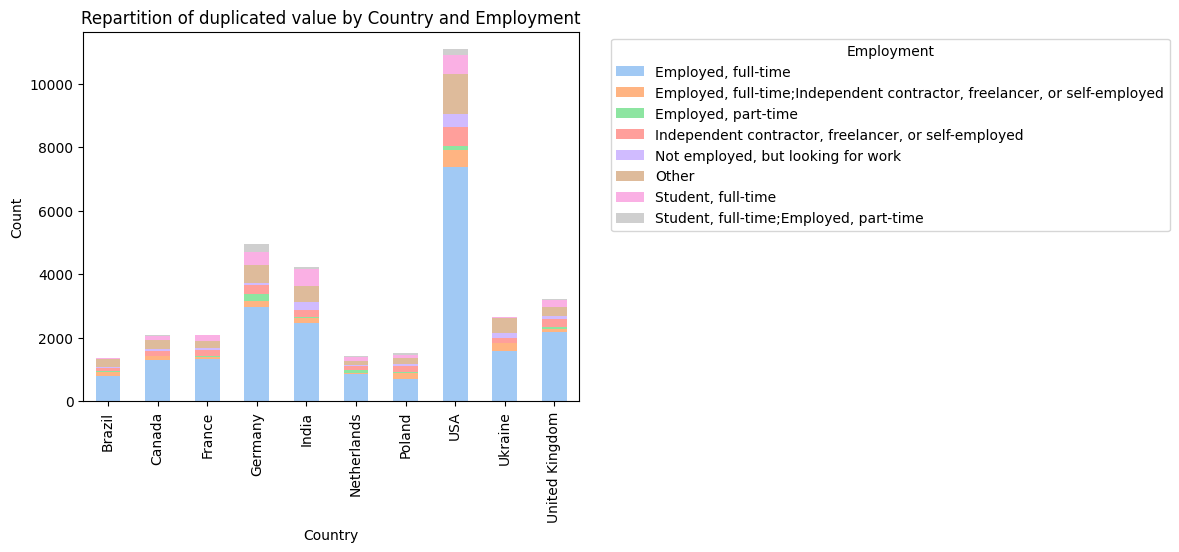

In [90]:
plt.figure(figsize=(12,8))
pivot_dups.plot(kind="bar", stacked=True, color=palette)
plt.title("Repartition of duplicated value by Country and Employment")
plt.xlabel("Country")
plt.ylabel("Count")
plt.legend(title="Employment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.savefig("DupsByCountry&Employment.png", bbox_inches='tight')
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [ ]:
# for column in dataset2.columns:
#     if dataset2[column].nunique() == 1:
#         print(f"'{column}' is uninformative")
#     numeric_columns = dataset2.select_dtypes(include=[float, int])
#     correlation_matrix = numeric_columns.corr()
#     print(correlation_matrix)

In [98]:
print(f"{df["ResponseId"].nunique()}/{df.shape[0]}")

65437/65457


In [104]:
for col in df.columns:
    print(f"Column '{col}' has {df[col].nunique()} value(s) in it.")

Column 'ResponseId' has 65437 value(s) in it.
Column 'MainBranch' has 5 value(s) in it.
Column 'Age' has 8 value(s) in it.
Column 'Employment' has 110 value(s) in it.
Column 'RemoteWork' has 3 value(s) in it.
Column 'Check' has 1 value(s) in it.
Column 'CodingActivities' has 118 value(s) in it.
Column 'EdLevel' has 8 value(s) in it.
Column 'LearnCode' has 418 value(s) in it.
Column 'LearnCodeOnline' has 10853 value(s) in it.
Column 'TechDoc' has 113 value(s) in it.
Column 'YearsCode' has 52 value(s) in it.
Column 'YearsCodePro' has 52 value(s) in it.
Column 'DevType' has 34 value(s) in it.
Column 'OrgSize' has 10 value(s) in it.
Column 'PurchaseInfluence' has 3 value(s) in it.
Column 'BuyNewTool' has 215 value(s) in it.
Column 'BuildvsBuy' has 3 value(s) in it.
Column 'TechEndorse' has 386 value(s) in it.
Column 'Country' has 185 value(s) in it.
Column 'Currency' has 142 value(s) in it.
Column 'CompTotal' has 3337 value(s) in it.
Column 'LanguageHaveWorkedWith' has 23864 value(s) in it

In [115]:
df_copy = df.drop("ResponseId", axis=1).copy()
df_copy.head()

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [118]:
df_copy.duplicated().sum()

np.int64(507)

In [121]:
for col in df.columns:
    print(f"Column '{col}' has {df[col].isna().sum()}/{df[col].shape[0]} NaN value(s) in it. ({df[col].isna().mean()*100:.2f}%)")

Column 'ResponseId' has 0/65457 NaN value(s) in it. (0.00%)
Column 'MainBranch' has 0/65457 NaN value(s) in it. (0.00%)
Column 'Age' has 0/65457 NaN value(s) in it. (0.00%)
Column 'Employment' has 0/65457 NaN value(s) in it. (0.00%)
Column 'RemoteWork' has 10637/65457 NaN value(s) in it. (16.25%)
Column 'Check' has 0/65457 NaN value(s) in it. (0.00%)
Column 'CodingActivities' has 10977/65457 NaN value(s) in it. (16.77%)
Column 'EdLevel' has 4654/65457 NaN value(s) in it. (7.11%)
Column 'LearnCode' has 4950/65457 NaN value(s) in it. (7.56%)
Column 'LearnCodeOnline' has 16206/65457 NaN value(s) in it. (24.76%)
Column 'TechDoc' has 24550/65457 NaN value(s) in it. (37.51%)
Column 'YearsCode' has 5570/65457 NaN value(s) in it. (8.51%)
Column 'YearsCodePro' has 13834/65457 NaN value(s) in it. (21.13%)
Column 'DevType' has 5994/65457 NaN value(s) in it. (9.16%)
Column 'OrgSize' has 17969/65457 NaN value(s) in it. (27.45%)
Column 'PurchaseInfluence' has 18043/65457 NaN value(s) in it. (27.56%)

In [122]:
# List of empty subset depending on the proportion of NaN
subset10 = []
subset20 = []
subset30 = []
subset40 = []
subset50 = []

In [126]:
# Length of the dataframe
table_len = df.shape[0]
# Get the stats of every columns in the dataframe
for col in df_copy.columns:
    unique_count = df_copy[col].nunique() # The amount of unique values in the column
    nan_count = df_copy[col].isna().sum() # The amount of NaN values in the column
    percentage = round(df_copy[col].isna().mean()*100, 2) # The percentage of NaN values in the column with two decimal
    if unique_count > 1 and percentage < 10.00:
        subset10.append(col)
    if unique_count > 1 and percentage < 20.00:
        subset20.append(col)
    if unique_count > 1 and percentage < 30.00:
        subset30.append(col)
    if unique_count > 1 and percentage < 40.00:
        subset40.append(col)
    if unique_count > 1 and percentage < 50.00:
        subset50.append(col)
    print(
        f"In column '{col}', there is:\n"
        f"{unique_count} unique value(s);\n"
        f"{nan_count}/{table_len} NaN value(s);\n"
        f"For a {percentage}% rate of NaN values;\n\n"
    )

In column 'MainBranch', there is:
5 unique value(s);
0/65457 NaN value(s);
For a 0.0% rate of NaN values;


In column 'Age', there is:
8 unique value(s);
0/65457 NaN value(s);
For a 0.0% rate of NaN values;


In column 'Employment', there is:
110 unique value(s);
0/65457 NaN value(s);
For a 0.0% rate of NaN values;


In column 'RemoteWork', there is:
3 unique value(s);
10637/65457 NaN value(s);
For a 16.25% rate of NaN values;


In column 'Check', there is:
1 unique value(s);
0/65457 NaN value(s);
For a 0.0% rate of NaN values;


In column 'CodingActivities', there is:
118 unique value(s);
10977/65457 NaN value(s);
For a 16.77% rate of NaN values;


In column 'EdLevel', there is:
8 unique value(s);
4654/65457 NaN value(s);
For a 7.11% rate of NaN values;


In column 'LearnCode', there is:
418 unique value(s);
4950/65457 NaN value(s);
For a 7.56% rate of NaN values;


In column 'LearnCodeOnline', there is:
10853 unique value(s);
16206/65457 NaN value(s);
For a 24.76% rate of NaN values;

In [128]:
print(f"{subset10},{len(subset10)}")
print(f"{subset20},{len(subset20)}")
print(f"{subset30},{len(subset30)}")
print(f"{subset40},{len(subset40)}")
print(f"{subset50},{len(subset50)}")

['MainBranch', 'Age', 'Employment', 'EdLevel', 'LearnCode', 'YearsCode', 'DevType', 'Country', 'LanguageHaveWorkedWith', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOHow', 'SOComm', 'AISelect'],15
['MainBranch', 'Age', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode', 'YearsCode', 'DevType', 'Country', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackSyncHaveWorkedWith', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOHow', 'SOComm', 'AISelect', 'SurveyLength', 'SurveyEase'],25
['MainBranch', 'Age', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'Country', 'Currency', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHave

In [129]:
print(f"There is {df_copy.duplicated(subset=subset50).sum()} duplicated rows with 'subset50'")
print(f"There is {df_copy.duplicated(subset=subset40).sum()} duplicated rows with 'subset40'")
print(f"There is {df_copy.duplicated(subset=subset30).sum()} duplicated rows with 'subset30'")
print(f"There is {df_copy.duplicated(subset=subset20).sum()} duplicated rows with 'subset20'")
print(f"There is {df_copy.duplicated(subset=subset10).sum()} duplicated rows with 'subset10'")

There is 507 duplicated rows with 'subset50'
There is 664 duplicated rows with 'subset40'
There is 802 duplicated rows with 'subset30'
There is 976 duplicated rows with 'subset20'
There is 1849 duplicated rows with 'subset10'


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
